# EDA

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('../data/train.csv', sep=',', encoding='cp949')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121754 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      121754 non-null  int64  
 1   X2      121754 non-null  float64
 2   X3      121754 non-null  float64
 3   X4      121754 non-null  float64
 4   X5      121754 non-null  object 
 5   X6      121754 non-null  int64  
 6   X7      121754 non-null  int64  
 7   X8      121754 non-null  object 
 8   Y1      121754 non-null  int64  
 9   Y2      121754 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 9.3+ MB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

## 2. 상관계수 분석

In [4]:
df_train.corr()

,X1,X2,X3,X4,X6,X7,Y1,Y2
X1,1.000000,0.036395,0.013615,-0.026711,0.000507,0.007135,-0.002177,0.003510
X2,0.036395,1.000000,0.071236,0.042574,-0.158771,0.044177,-0.007743,0.044153
X3,0.013615,0.071236,1.000000,-0.235422,0.690245,-0.015878,-0.008360,0.647310
X4,-0.026711,0.042574,-0.235422,1.000000,-0.280827,0.013660,-0.006570,-0.014904
X6,0.000507,-0.158771,0.690245,-0.280827,1.000000,-0.049332,0.018045,0.449190
X7,0.007135,0.044177,-0.015878,0.013660,-0.049332,1.000000,-0.005768,-0.017499
Y1,-0.002177,-0.007743,-0.008360,-0.006570,0.018045,-0.005768,1.000000,-0.004060
Y2,0.003510,0.044153,0.647310,-0.014904,0.449190,-0.017499,-0.004060,1.000000


<AxesSubplot:>

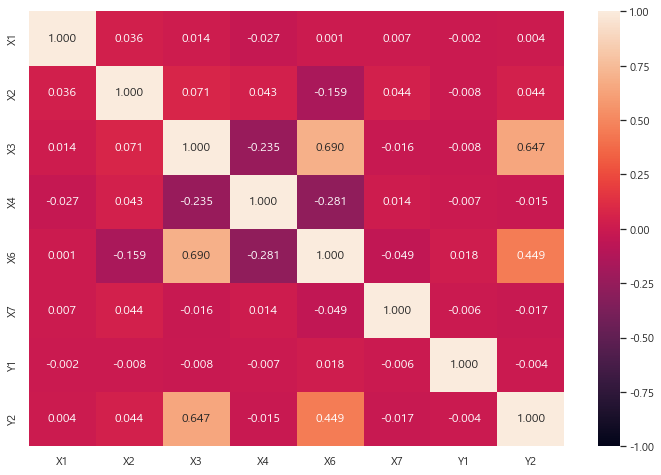

In [5]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df_train.corr(), annot=True, fmt = '.3f', vmin = -1, vmax = 1)

예측변수 2개 마킹시간과, 절단시간의 상관관계가 낮기 때문에 예측을 할때 2개를 분리해서 각 각 예측하는 모델을 생성하는 방향이 좋아보임

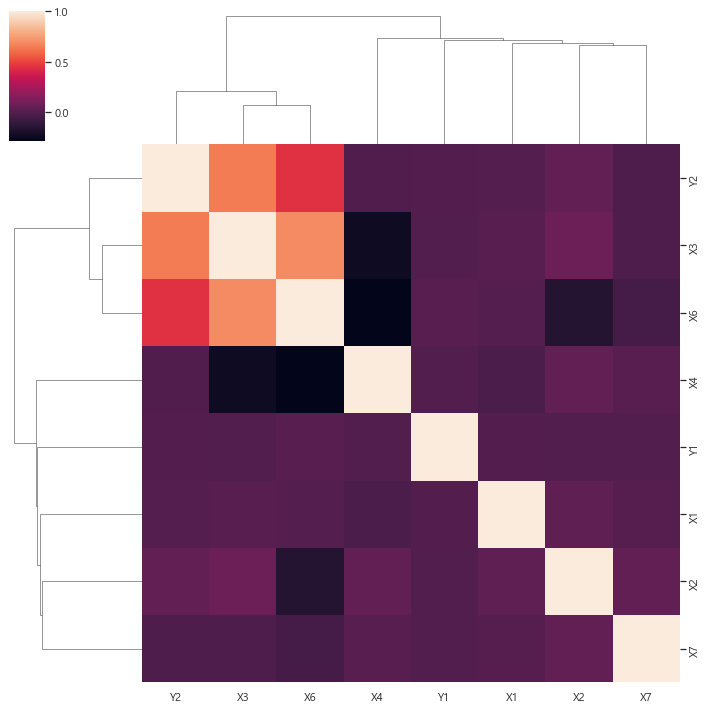

In [6]:
sns.clustermap(df_train.corr()) # 상관계수가 유사한 것끼리 묶어준다.

## 3. Numeric 데이터 산포도 

### 전범위

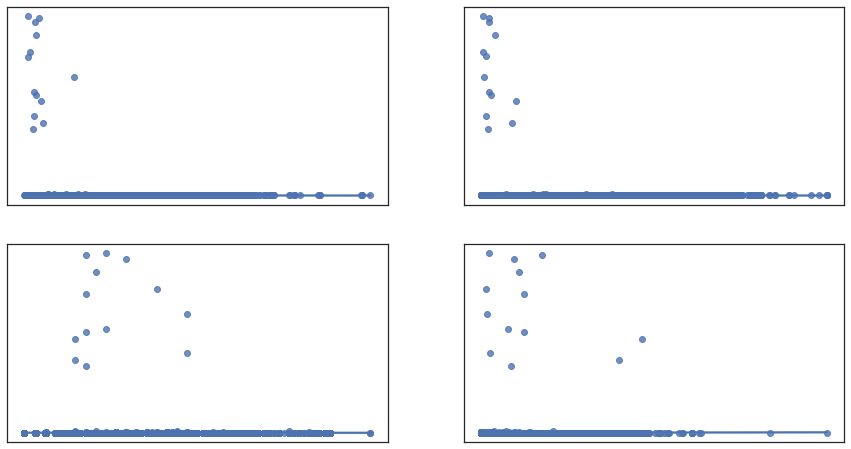

In [7]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y1', data=df_train, ax=axs[row][col])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

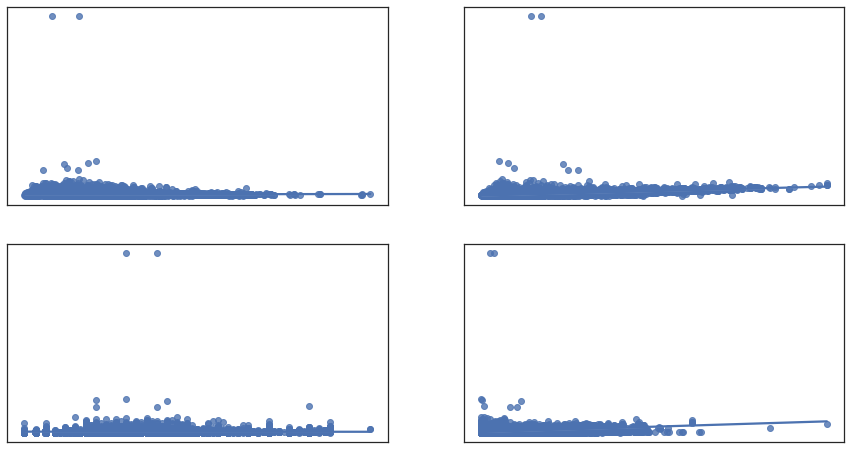

In [8]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y2', data=df_train, ax=axs[row][col])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

### 범위 축소

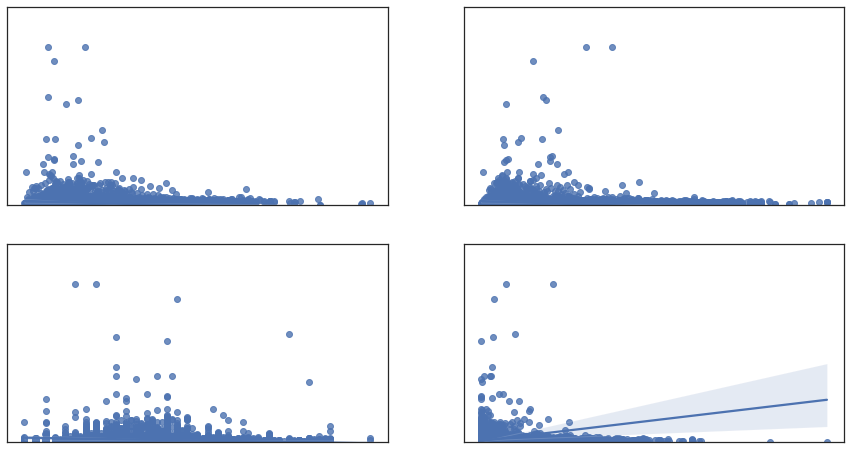

In [9]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y1', data=df_train, ax=axs[row][col])
    ax.set(ylim=(0, 80000))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

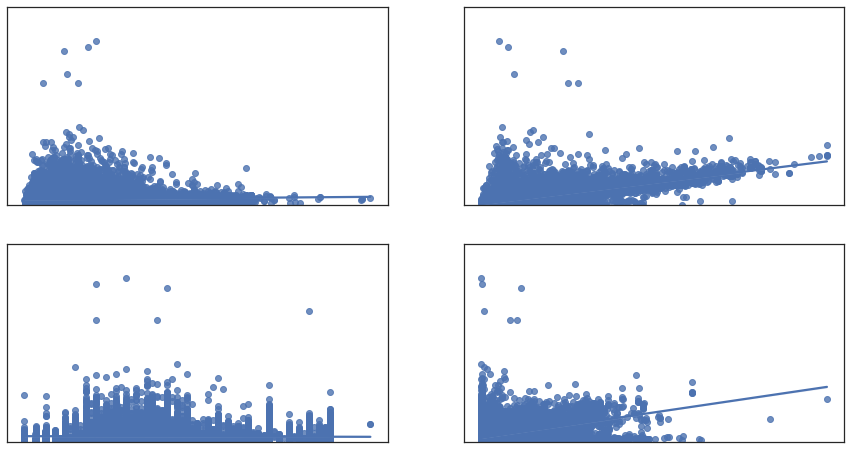

In [10]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y2', data=df_train, ax=axs[row][col])
    ax.set(ylim=(0,80000))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

## 4. 범주형 데이터 Boxplot

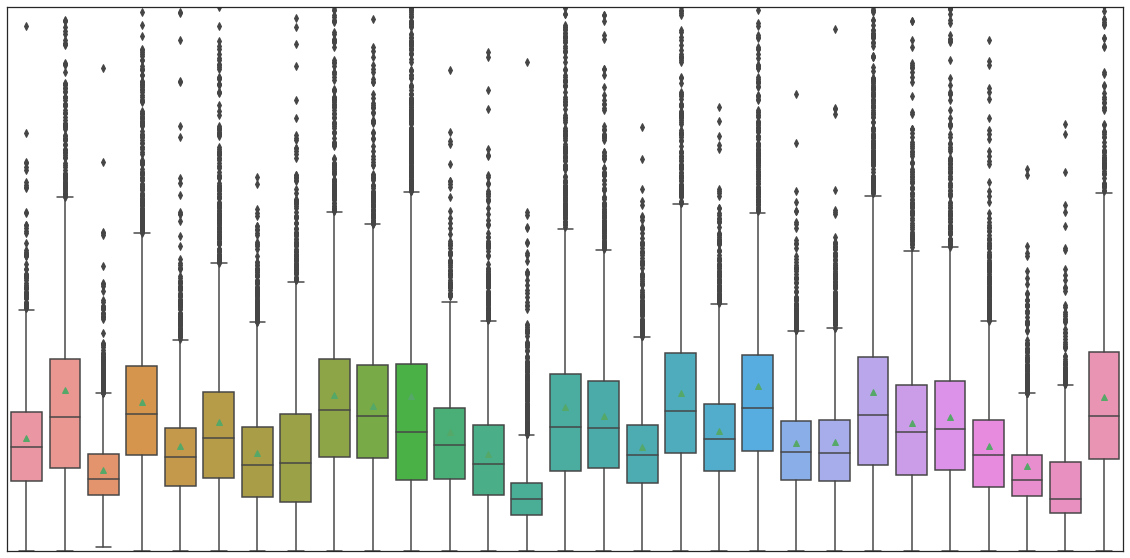

In [11]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,2000)
ax = sns.boxplot(x='X8', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

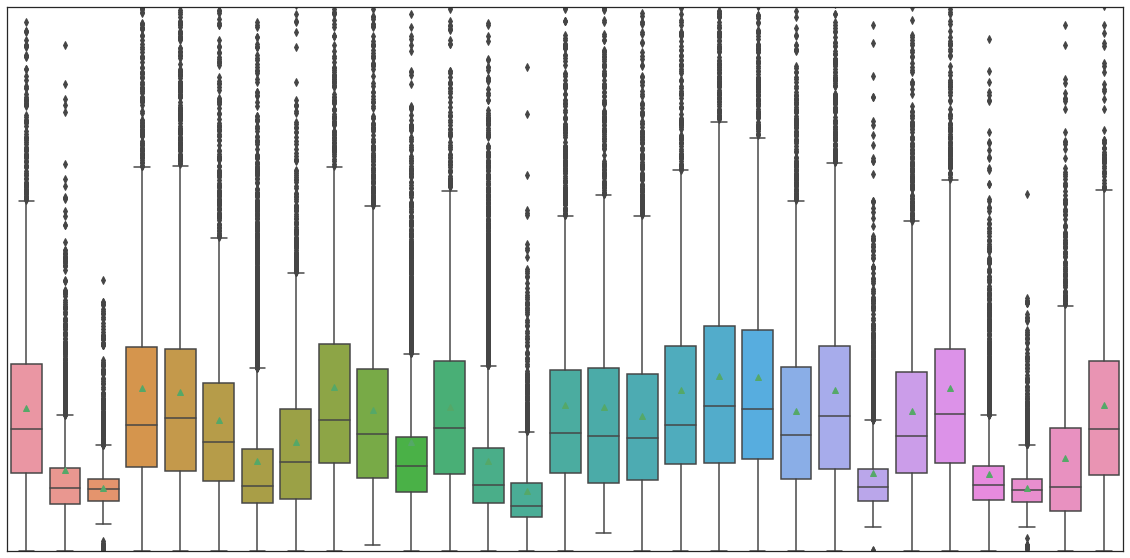

In [12]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X8', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

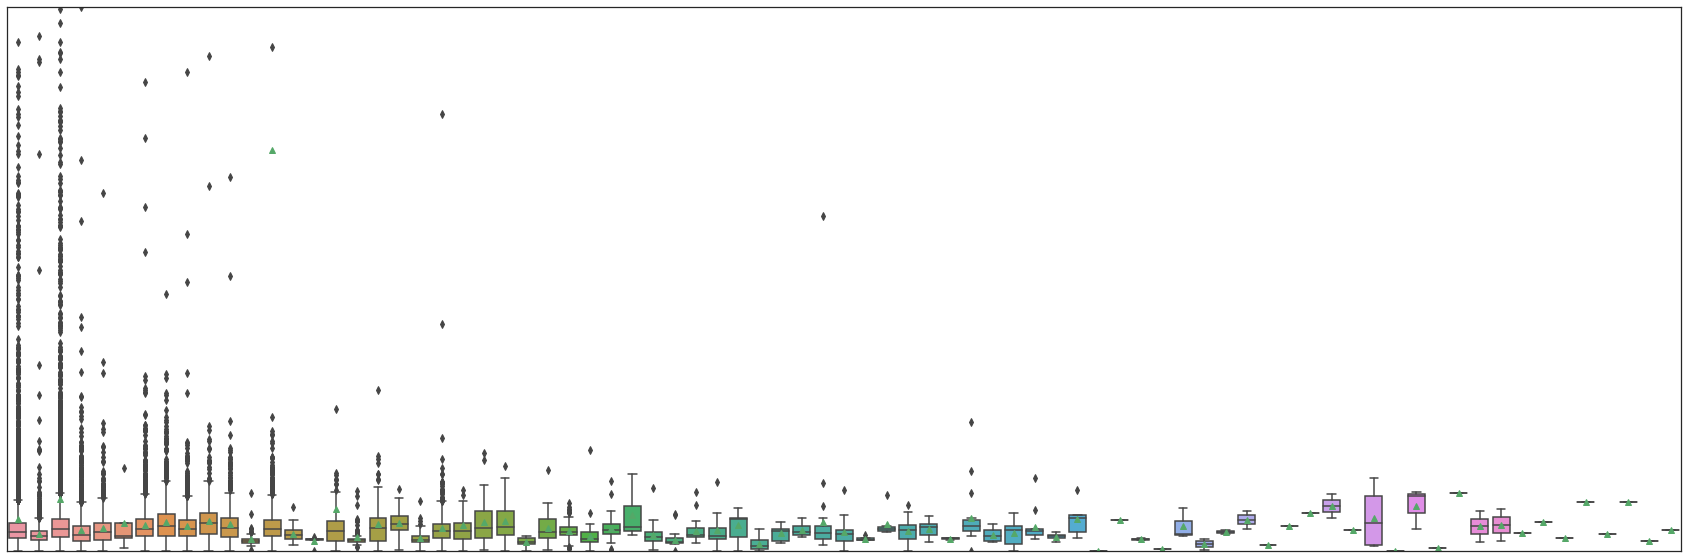

In [13]:
figure = plt.figure(figsize=(30,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X5', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

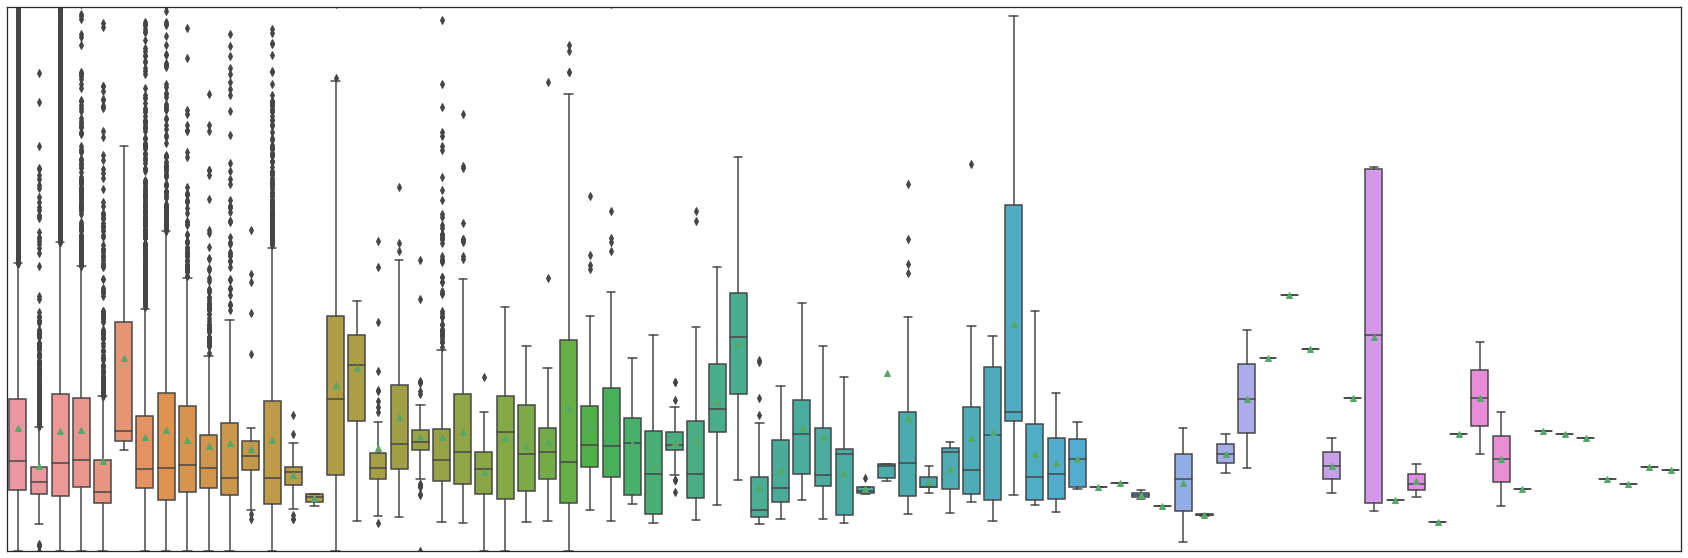

In [14]:
figure = plt.figure(figsize=(30,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X5', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

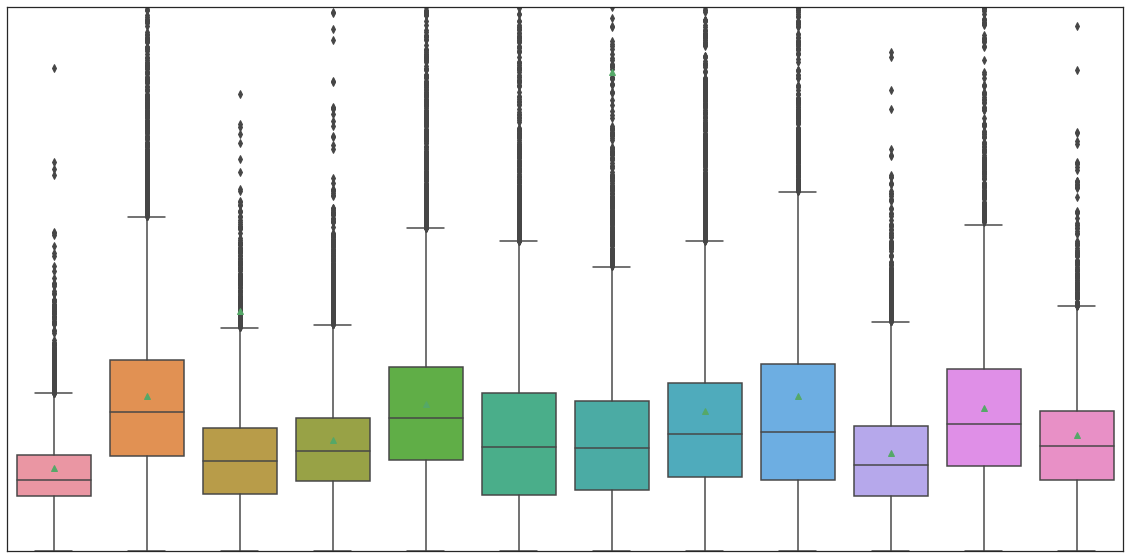

In [15]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,2000)
ax = sns.boxplot(x='X7', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

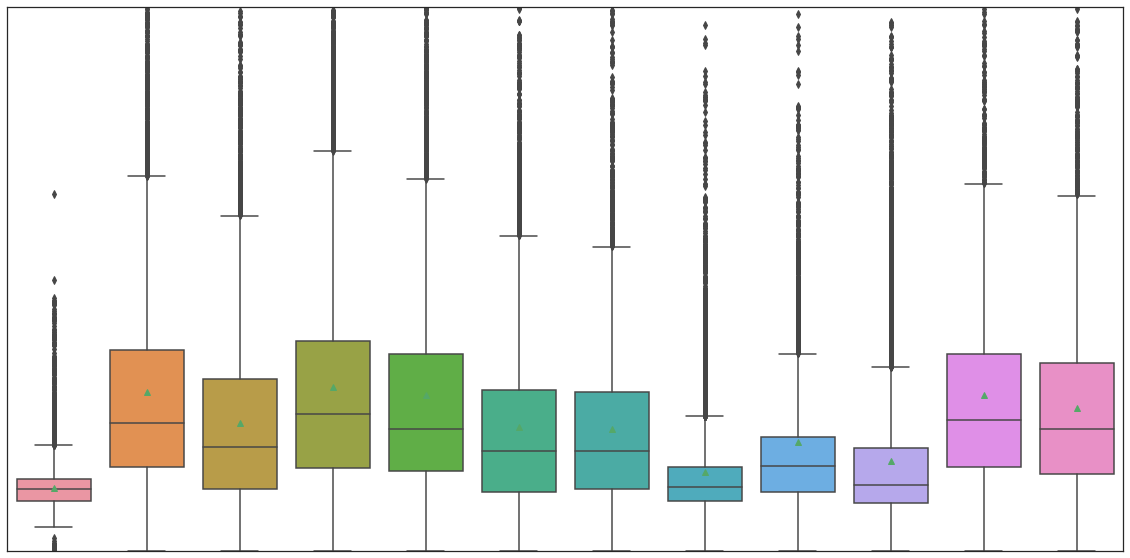

In [16]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X7', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)